In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Vanilla Gradient Descent

$$
\textbf{x}_{k+1} = \textbf{x}_{k} - \eta \nabla f(\textbf{x}_{k})
$$

Momentum

$$
\textbf{x}_{k+1} = \textbf{x}_{k} - \eta \nabla f(\textbf{x}_{k}) + \beta(\textbf{x}_{k} - \textbf{x}_{k-1})
$$

Accelerating

$$
\textbf{x}_{k+1} = \textbf{x}_{k} - \eta \nabla f(\textbf{x}_{k}) + \beta(\textbf{x}_{k} - \textbf{x}_{k-1}) + \beta(\textbf{x}_{k} - \textbf{x}_{k-1})
$$

In [2]:
def f(x, a=1, b=100):
    x1, x2 = x[0], x[1]
    return (a-x1)**2 + b*(x2-x1**2)**2

def gf(x, a=1, b=100):
    x1, x2 = x[0], x[1]
    return np.array([
        -2*(a-x1) - 4*b*x1*(x2-x1**2),
        2*b*(x2-x1**2)
    ])

def minimize(hh, gradh, x0, args={}, method='gd', 
             alpha=0.1, beta=0.1, maxsteps=10, bound=1e3, tol=1e-3):
    if method not in ['gd', 'cm', 'ag']:
        print('Unrecognized method.')
        return None
        
    # store trace of updates
    w = np.zeros((maxsteps,2))
    
    # convenience function references
    def h(x): return hh(x, **args)
    def gh(x): return gradh(x, **args)
    
    # initial step always simple gradient
    w[0] = x0
    w[1] = w[0] - alpha*gh(w[0])

    for k in range(1, maxsteps-1): 
        if method=='gd':
            w[k+1] = w[k] - alpha*gh(w[k])
        elif method=='cm':
            w[k+1] = w[k] - alpha*gh(w[k]) + beta*(w[k] - w[k-1])
        elif method=='ag':
            vk = w[k] - w[k-1]
            w[k+1] = w[k] - alpha*gh(w[k]+beta*vk) + beta*vk
            
        if np.linalg.norm(w[k+1]) > bound:
            print('Unbounded behavior.')
            break
            
        if k % 10 == 0 and np.abs(h(w[k+1]) - h(w[k])) <= tol:
            break
        
    return w[:k+1]

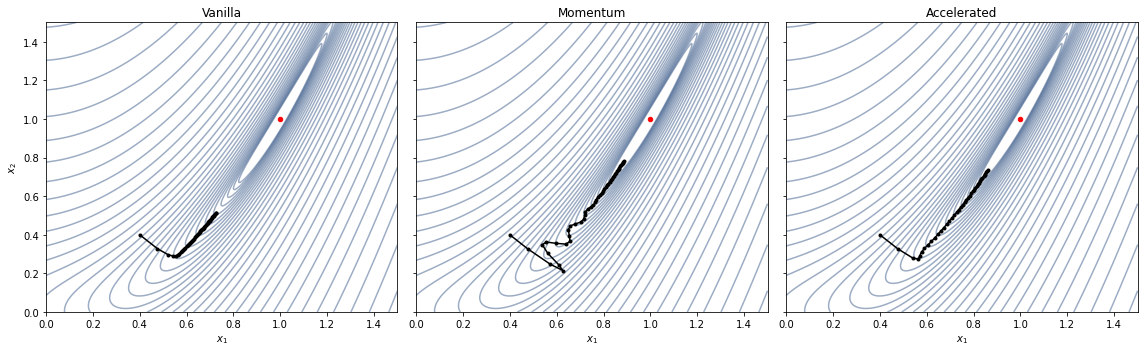

In [4]:
#fargs = {'a':1, 'b':10}
x0    = [0.4, 0.4]
kws   = {'alpha': 0.015, 'beta': 0.7, 'maxsteps': 50}

x, y = (np.linspace(0, 1.5, 500), np.linspace(0, 1.5, 500))
X, Y = np.meshgrid(x, y)
Z = f([X,Y], a=1, b=10)

fig, ax = plt.subplots(1,3, sharey=True, figsize=(16,5))
for i,(name,m) in enumerate([('Vanilla','gd'), ('Momentum', 'cm'), ('Accelerated', 'ag')]):
    w = minimize(f, gf, [0.4, 0.4], args={'a':1, 'b':10}, method=m, **kws)
    ax[i].contour(X, Y, Z, levels=np.logspace(-1.5,  3.5, 50, base=10), 
                  cmap='Blues_r', alpha=0.4)
    ax[i].scatter([1],[1], c='r', s=20)
    ax[i].plot(w[:,0], w[:,1], 'k.-')
    ax[i].set(xlabel=r'$x_1$', title=name)
ax[0].set(ylabel=r'$x_2$')
plt.tight_layout()
plt.show()